<h1 style="color: #007acc;">Time Series Analysis of Daily Steps Data </h1>
<h1 style="color: #007acc;">Author: Buhle Maphela </h1>
<h1 style="color: #007acc;">Student Number: 217076335 </h1>
<h1 style="color: #007acc;">Due Date: 16 August 2023 </h1>

<h1 style="color: #007acc;">Sources:</h1>

#### 1. https://www.nbshare.io/notebook/136553745/Time-Series-Analysis-Using-ARIMA-From-StatsModels/

#### 2. Lecture Notes

#### 3. ChatGPT

<h1 style="color: #007acc;">Github url:</h1>

<h2 style="color: #33a02c;">Introduction</h2>
I will be performing a time series analysis on a fitness dataset to gain insights into the patterns and trends in an individual's daily steps over time. The dataset contains informaon about daily steps taken by an individual and some superfluous data. My goal is to analyze the data and identify any recurring patterns, seasonal variaons, or anomalies that could help opmize the individual's fitness roune.

<h2 style="color: #33a02c;">Dataset</h2>
The fitness dataset comprises daily steps measurements for 15 months. It includes the following variables:
1. Date: The date of the measurement.
2. Steps: The number of steps taken by the individual on a given day.
3. Goal: A daily steps goal You can download the dataset in CSV format from Blackboard. 
There are 15 different files that will be analysed.

<h2 style="color: #33a02c;">Objectives</h2>
1. Explore the overall trends in daily steps taken by the individual.
2. Identify any seasonality or recurring patterns in the data.
3. Forecast the time series and test the fitness of it.

<h2 style="color: #E0115F;">Beginning of my code </h2>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX


<h2 style="color: #E0115F;">1. Data Preparation</h2>

This code will read and combine the data from the 15 files into a single DataFrame, allowing me to work with the combined data. 

In [2]:
file_paths = ['C:\\Users\\buhle\\Documents\\Honours\\daily steps sources\\Steps1.csv', 'C:\\Users\\buhle\\Documents\\Honours\\daily steps sources\\Steps2.csv', 'C:\\Users\\buhle\\Documents\\Honours\\daily steps sources\\Steps3.csv',
             'C:\\Users\\buhle\\Documents\\Honours\\daily steps sources\\Steps4.csv','C:\\Users\\buhle\\Documents\\Honours\\daily steps sources\\Steps5.csv','C:\\Users\\buhle\\Documents\\Honours\\daily steps sources\\Steps6.csv',
             'C:\\Users\\buhle\\Documents\\Honours\\daily steps sources\\Steps7.csv','C:\\Users\\buhle\\Documents\\Honours\\daily steps sources\\Steps8.csv','C:\\Users\\buhle\\Documents\\Honours\\daily steps sources\\Steps9.csv',
             'C:\\Users\\buhle\\Documents\\Honours\\daily steps sources\\Steps10.csv','C:\\Users\\buhle\\Documents\\Honours\\daily steps sources\\Steps11.csv','C:\\Users\\buhle\\Documents\\Honours\\daily steps sources\\Steps12.csv',
             'C:\\Users\\buhle\\Documents\\Honours\\daily steps sources\\Steps13.csv','C:\\Users\\buhle\\Documents\\Honours\\daily steps sources\\Steps14.csv','C:\\Users\\buhle\\Documents\\Honours\\daily steps sources\\Steps15.csv']

# Create an empty list to store DataFrames
data_frames = []

# Loop through each file path
for file_path in file_paths:
    df = pd.read_csv(file_path)
    data_frames.append(df)
    combined_df = pd.concat(data_frames, ignore_index=True) # Concatenate DataFrames into a single DataFrame
    
# Convert the 'Date' column to datetime format
combined_df['Date'] = pd.to_datetime(combined_df['Date'])

# Set the 'Date' column as the index
combined_df.set_index('Date', inplace=True)

# Display the combined DataFrame
print(combined_df)


            Actual  Goal
Date                    
2022-05-31       0  8000
2022-06-01       0  8000
2022-06-02       0  8000
2022-06-03    1102  8000
2022-06-04    1254  8000
...            ...   ...
2023-07-20    8393  6500
2023-07-21    5954  6500
2023-07-22    9550  6500
2023-07-23    5157  6500
2023-07-24    8923  6500

[420 rows x 2 columns]


<h3 style="color: #A45A52;">1.1 Cleaning the data</h3>

Check for missing values. If there are any, replace missing values with the mean

Check for values equal to zero. If there are any, replace values using backward fill

In [3]:
#Checking for any missing values
missing_values = combined_df.isnull().sum()
print("There are {} missing values in the dataset.".format(missing_values.sum()))

#Replacing with mean
combined_df = combined_df.fillna(combined_df.mean())
print("\n")

# ChecK and Replace values equal to 0 with backward fill
combined_df["Actual"] = combined_df["Actual"].replace(0,method="bfill")

print(combined_df)

There are 0 missing values in the dataset.


            Actual  Goal
Date                    
2022-05-31    1102  8000
2022-06-01    1102  8000
2022-06-02    1102  8000
2022-06-03    1102  8000
2022-06-04    1254  8000
...            ...   ...
2023-07-20    8393  6500
2023-07-21    5954  6500
2023-07-22    9550  6500
2023-07-23    5157  6500
2023-07-24    8923  6500

[420 rows x 2 columns]


In [4]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420 entries, 2022-05-31 to 2023-07-24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Actual  420 non-null    int64
 1   Goal    420 non-null    int64
dtypes: int64(2)
memory usage: 9.8 KB


<h2 style="color: #E0115F;">2. Exploratory Data Analysis (EDA)</h2>

The  initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

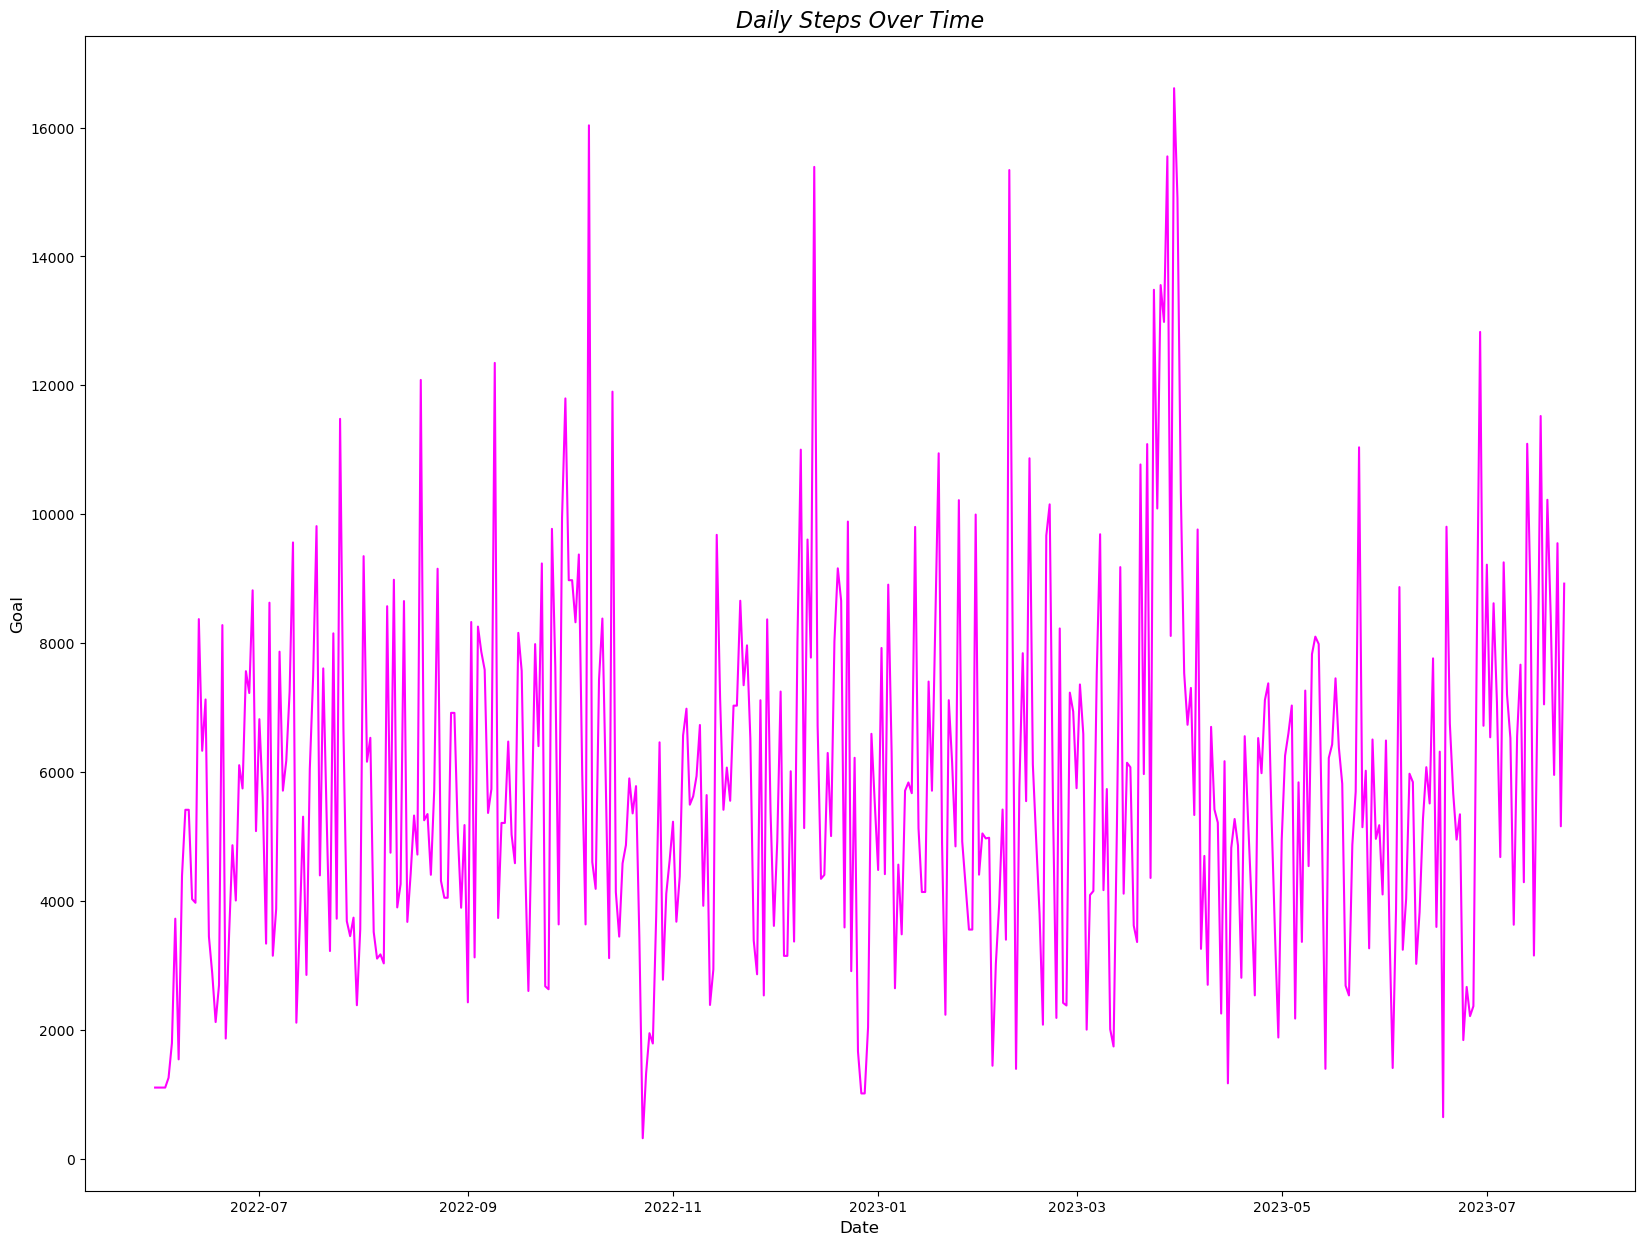

In [5]:
# Plot the time series of daily steps
plt.figure(figsize=(20, 15))
plt.plot(combined_df['Actual'], color='magenta')
plt.title('Daily Steps Over Time', fontsize=16, fontstyle='italic')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Goal', fontsize=12)
plt.show()


<h3 style="color: #A45A52;">2.1 Descriptive Analysis</h3>

In [6]:
combined_df.describe().round(2)

,Actual,Goal
count,420.00,420.00
mean,5799.73,7682.14
std,2801.38,613.72
min,316.00,6500.00
25%,3731.25,8000.00
50%,5417.50,8000.00
75%,7362.25,8000.00
max,16611.00,8000.00


<h2 style="color: #E0115F;">3. Test for Seasonality and Stationarity</h2>


<Figure size 2000x1500 with 0 Axes>

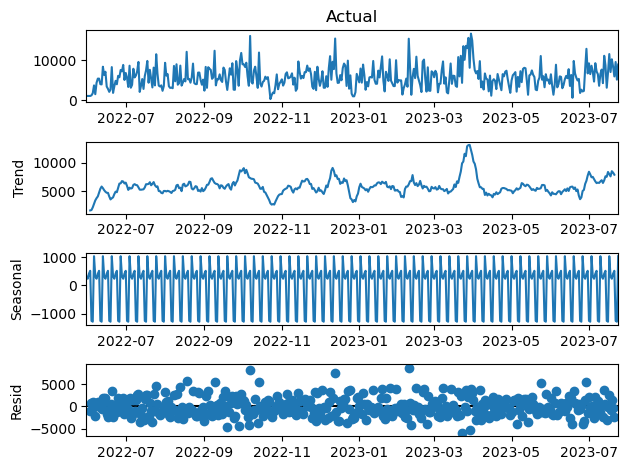

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform a seasonal decomposition of the time series
result = seasonal_decompose(combined_df['Actual'], model='additive')
plt.figure(figsize=(20, 15))
result.plot()
plt.show()

<h3 style="color: #A45A52;">3.1 Augmented Dickey-Fuller test for stationarity </h3>

Perform an Augmented Dickey-Fuller test to test if the data is stationary

##### NOTE:
If P value is less than 0.05 that means we can reject the null hypothesis. Therefore we can conclude that data has no unit root and is stationary.

If P value is greater than 0.05 that means Weak evidence against null hypothesis and time series has a unit root which indicates that it is non-stationary 

In [8]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
adf_test = adfuller(combined_df["Actual"])

# Extract the test statistics and p-value
adf_statistic = adf_test[0]
p_value = adf_test[1]
critical_values = adf_test[4]

print("ADF Statistic:", adf_statistic)
print("\n")

print("p-value:", p_value)
print("\n")

print("Critical Values:", critical_values)
print("\n")

# If the p-value is less than 0.05, then the data is stationary
if p_value < 0.05:
    print("THE DATA IS STATIONARY.")
else:
    print("THE DATA IS NOT STATIONARY.")
    



ADF Statistic: -4.7256657217888565


p-value: 7.52904975674442e-05


Critical Values: {'1%': -3.44664043608676, '5%': -2.868720756230461, '10%': -2.5705951311145965}


THE DATA IS STATIONARY.


<h2 style="color: #E0115F;">4. Model Selection</h2>

<h3 style="color: #A45A52;">4.1 ARIMA Model </h3>

Here i will be using the Hyndman-Khandakar() (also known as auto_arima() ) method which uses the Akaike information criterion (AIC) to automatically select the best model parameters. 

In [9]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Define the training data
start_date = pd.to_datetime("2023-06-25")
end_date = pd.to_datetime("2023-07-25")

train_data = combined_df.loc[start_date:end_date, "Actual"]

# Use auto_arima to find the best ARIMA parameters
model = auto_arima(train_data, seasonal=False, stepwise=True, trace=True,
                   suppress_warnings=True, error_action="ignore")

print("Best ARIMA parameters:", model.order)

# Create the ARIMA model
arima_model = ARIMA(combined_df["Actual"], order= model.order)

# Fit the ARIMA model
arima_fit = arima_model.fit()

print(arima_fit.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=623.138, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=580.171, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=577.074, Time=0.01 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=574.415, Time=0.02 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=576.296, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=574.944, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=572.891, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=571.179, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=600.098, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.464 seconds
Best ARIMA parameters: (1, 0, 1)
                  

C:\Users\buhle\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\buhle\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\buhle\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<h3 style="color: #A45A52;">Forecast </h3>

Plot the actual vs the forecasted steps

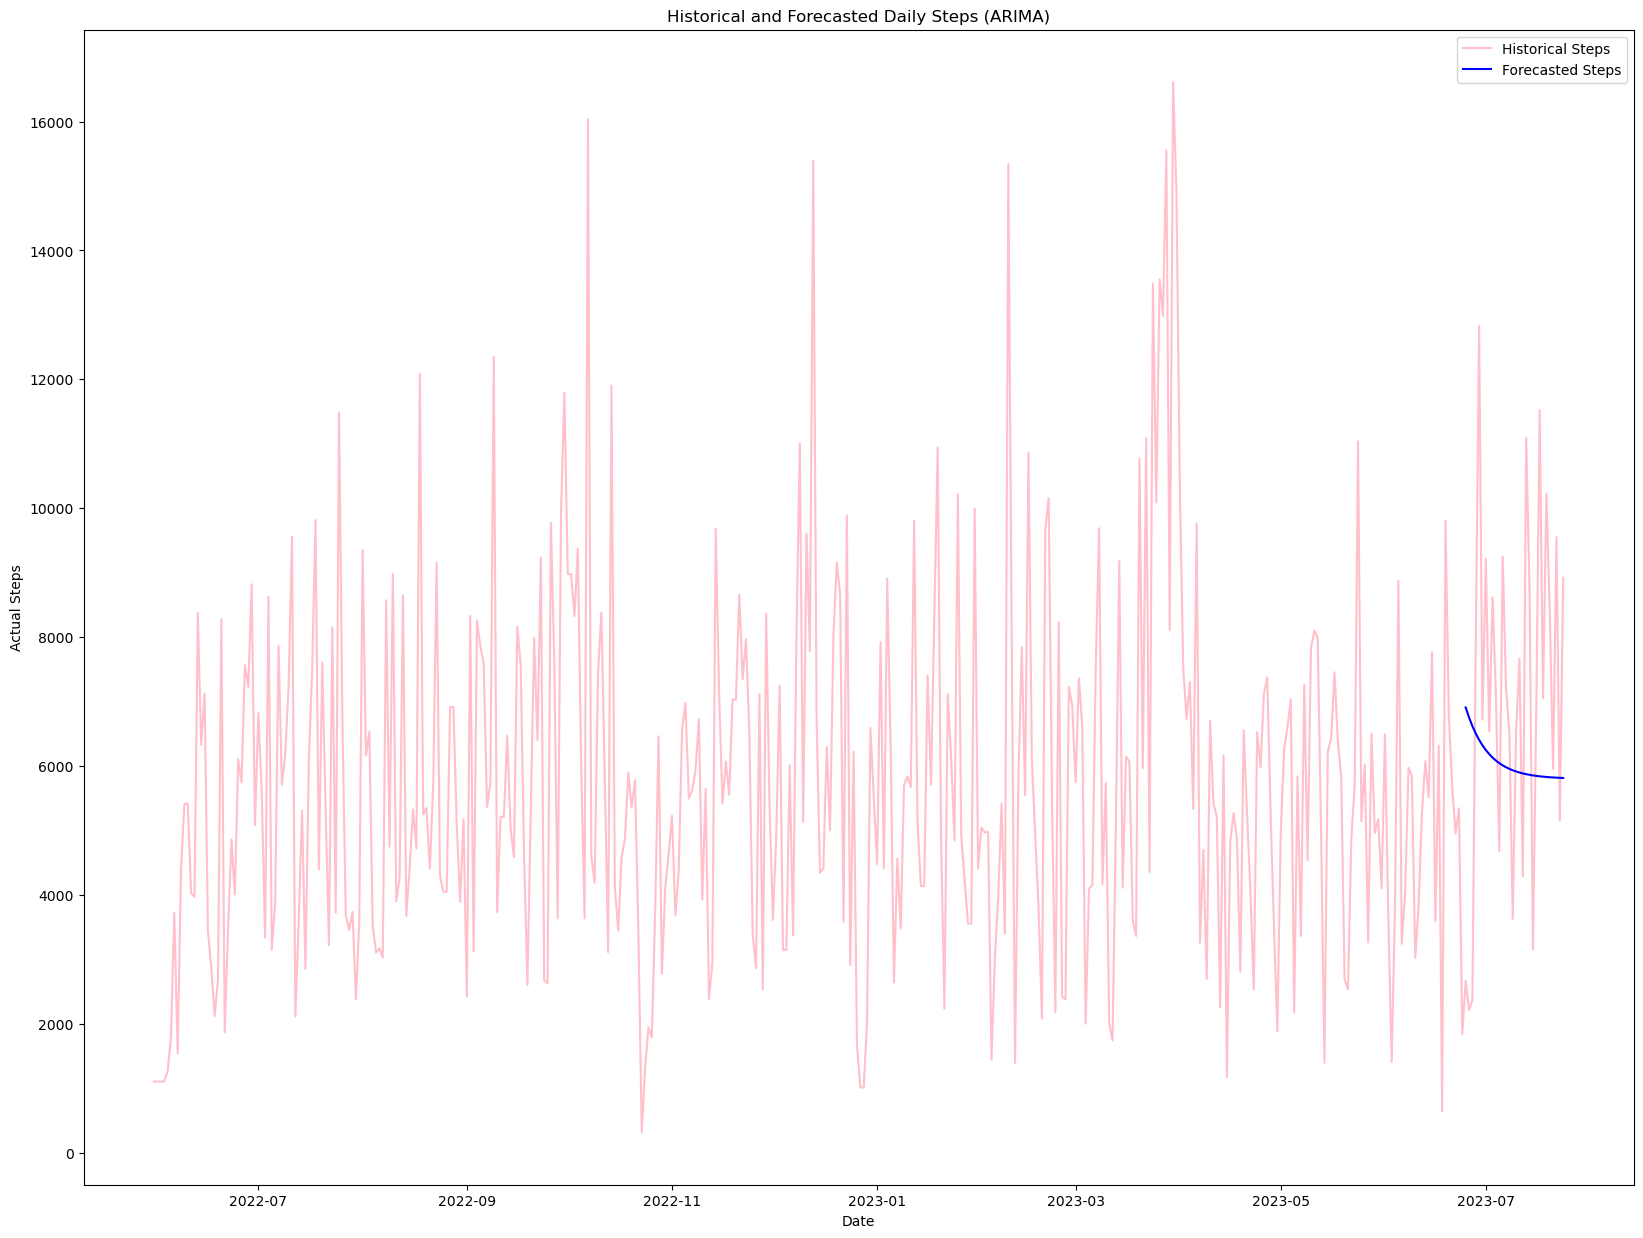

In [11]:
# Define the forecast horizon (June 25, 2023, to July 25, 2023)
start_date = pd.to_datetime("2023-06-25")
end_date = pd.to_datetime("2023-07-25")
forecast_horizon = (end_date - start_date).days   

# Generate forecasts for the specified time range
forecast_steps = arima_fit.forecast(steps=forecast_horizon)

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({"Date": pd.date_range(start=start_date, periods=forecast_horizon),
                            "Forecasted_Steps": forecast_steps})

# Plot the forecast
plt.figure(figsize=(20, 15))
plt.plot(combined_df.index, combined_df["Actual"], label="Historical Steps", color= 'Pink')
plt.plot(forecast_df["Date"], forecast_df["Forecasted_Steps"], label="Forecasted Steps", color="blue")
plt.title("Historical and Forecasted Daily Steps (ARIMA)")
plt.xlabel("Date")
plt.ylabel("Actual Steps")
plt.legend()
plt.show()

Based on the above forecasting, we can observe that ARIMA is not producing realistic results, therefore I'll try a different selection model.


<h3 style="color: #A45A52;">Mean Square Error (MSE) & R-Squared (R2) </h3>

In [12]:
actual_steps = combined_df.loc[start_date:end_date - pd.DateOffset(days=1), "Actual"]
mse = mean_squared_error(actual_steps, forecast_df["Forecasted_Steps"])

r2 = r2_score(actual_steps, forecast_df["Forecasted_Steps"])

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 8979051.319243647
R-squared: -0.2373660203562853


<h3 style="color: #A45A52;">4.2 SARIMA Model </h3>

Here I will use auto_arima() function. The auto_arima() function automatically searches for the best SARIMA model parameters for the given data.

In [13]:
import itertools

# Select a range of potential parameter values
p_values = range(0, 2) 
d_values = range(1, 2)  
q_values = range(0, 2)  

# Create a list of all possible combinations of parameters
param_combinations = list(itertools.product(p_values, d_values, q_values))

# Initialize variables to store best parameters and lowest MSE
best_params = None
lowest_mse = float("inf")

# Iterate through parameter combinations
for p, d, q in param_combinations:
    # Fit the SARIMA model
    sarima_model = SARIMAX(combined_df["Actual"], order=(p, d, q), seasonal_order=(0, 1, 1, 7))
    sarima_fit = sarima_model.fit()
    
    # Generate forecasts for the specified time range
    forecast_steps = sarima_fit.forecast(steps=forecast_horizon)
    
    # Calculate MSE
    actual_steps = combined_df.loc[start_date:end_date, "Actual"]
    mse = mean_squared_error(actual_steps, forecast_steps)
    
    # Update best parameters if lower MSE is found
    if mse < lowest_mse:
        lowest_mse = mse
        best_params = (p, d, q)
        print("\n")
        
# Print best parameters and plot the forecast
print("Best Parameters:", best_params)
print("\n")

# Fit the SARIMA model with the best parameters
best_sarima_model = SARIMAX(combined_df["Actual"], order=best_params, seasonal_order=(0, 1, 1, 7))
best_sarima_fit = best_sarima_model.fit()
print(best_sarima_fit.summary())




C:\Users\buhle\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\buhle\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\buhle\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\buhle\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


C:\Users\buhle\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\buhle\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


C:\Users\buhle\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\buhle\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Best Parameters: (1, 1, 0)


                                      SARIMAX Results                                      
Dep. Variable:                              Actual   No. Observations:                  420
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 7)   Log Likelihood               -3871.332
Date:                             Sat, 19 Aug 2023   AIC                           7748.665
Time:                                     20:55:02   BIC                           7760.728
Sample:                                 05-31-2022   HQIC                          7753.436
                                      - 07-24-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5106      0.036    -14.280      0.000      -0.581      -0.44

C:\Users\buhle\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\buhle\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<h3 style="color: #A45A52;">Forecast</h3>

Plot the actual vs the forecasted steps

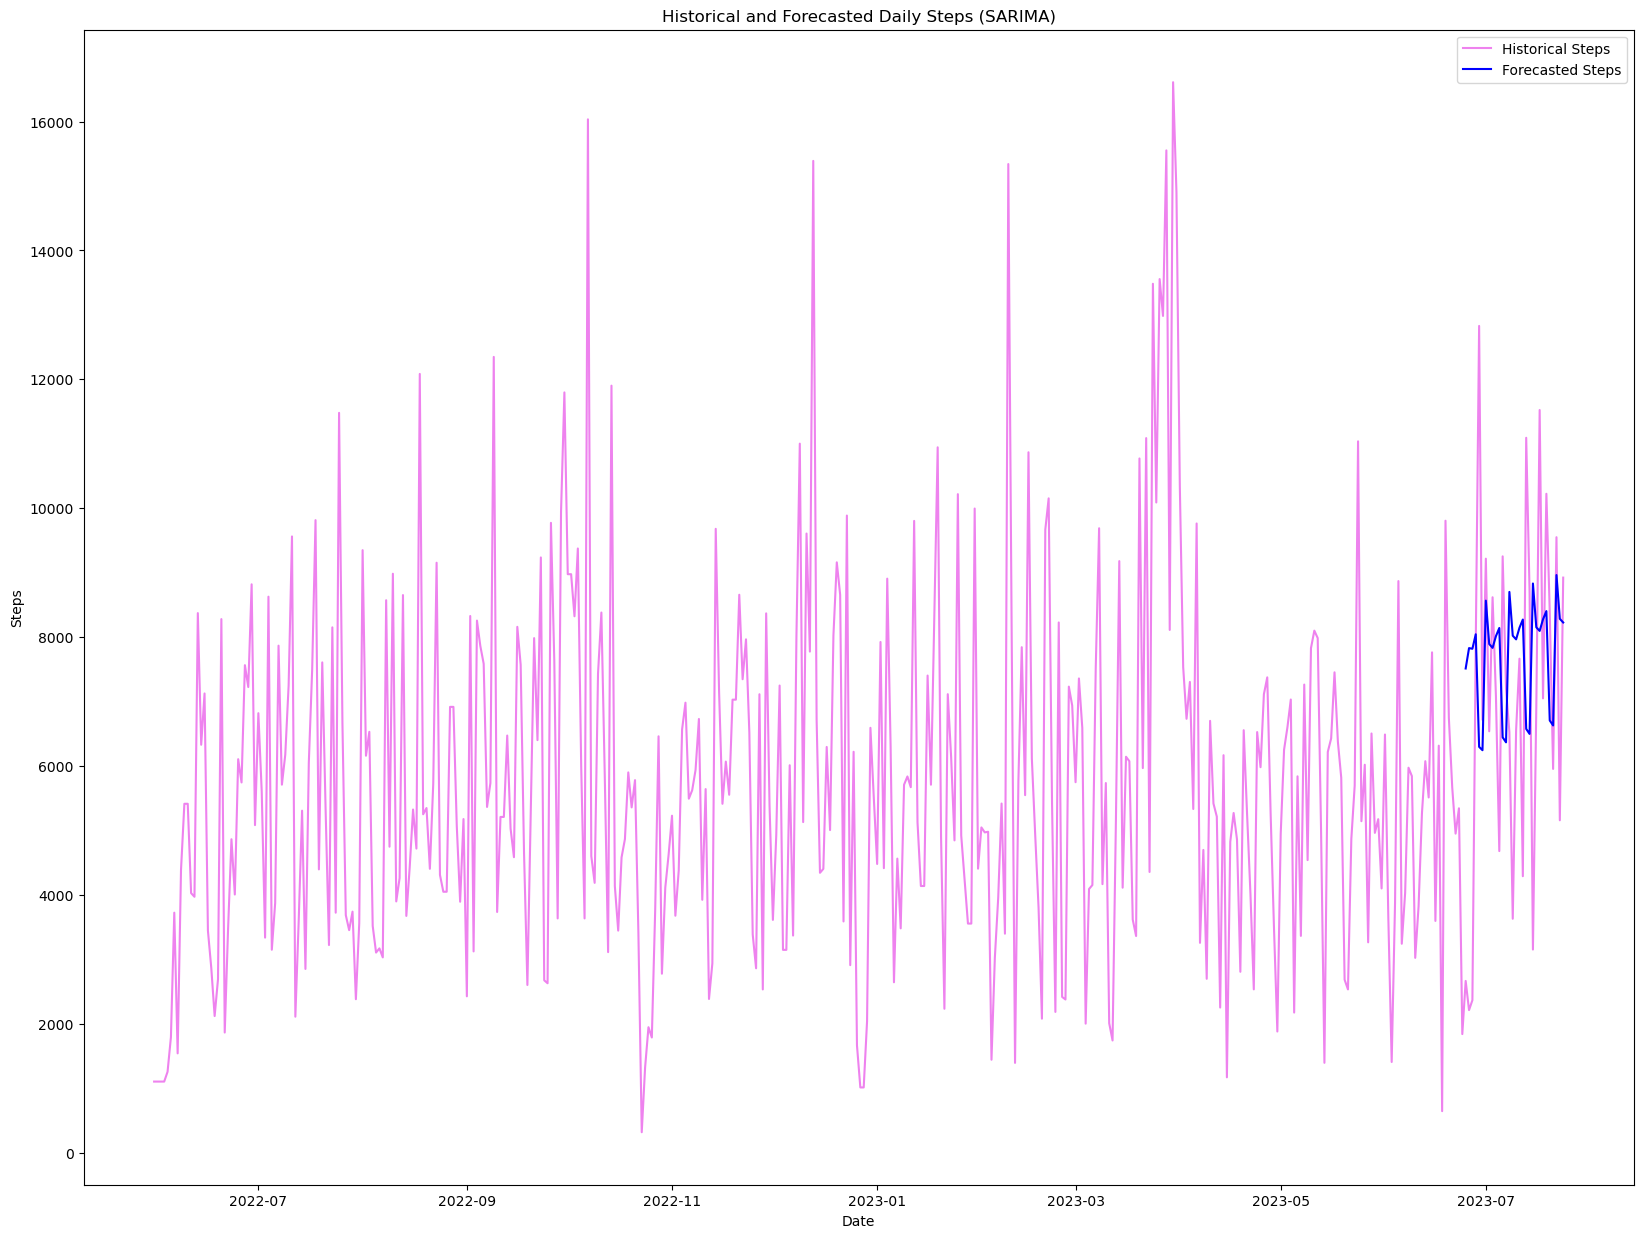

In [14]:
# Generate forecasts for the specified time range
forecast_steps = best_sarima_fit.forecast(steps=forecast_horizon)

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({"Date": pd.date_range(start=start_date, periods=forecast_horizon),"Forecasted_Steps": forecast_steps})

# Plot the forecast
plt.figure(figsize=(20, 15))
plt.plot(combined_df.index, combined_df["Actual"], label="Historical Steps", color= 'violet')
plt.plot(forecast_df["Date"], forecast_df["Forecasted_Steps"], label="Forecasted Steps", color="blue")
plt.title("Historical and Forecasted Daily Steps (SARIMA)")
plt.xlabel("Date")
plt.ylabel("Steps")
plt.legend()
plt.show()


<h3 style="color: #A45A52;">Mean Square Error (MSE) & R-Squared (R2) </h3>

In [15]:
actual_steps = combined_df.loc[start_date:end_date, "Actual"]
mse = mean_squared_error(actual_steps, forecast_steps)
r2 = r2_score(actual_steps, forecast_df["Forecasted_Steps"])

print("Mean Square Error:", mse)
print("R-squared:", r2)

Mean Square Error: 9458278.968173528
R-squared: -0.30340640566182486


<h2 style="color: #E0115F;">5. Reflection</h2>


In this time series analysis of daily steps data, we aimed to gain insights into an individual's fitness routine by exploring patterns, identifying seasonality, and forecasting future steps. 

#### Decision-making process:

I first performed a descriptive analysis of the data to get a sense of the overall distribution and trends. I then performed an augmented Dickey-Fuller test to check for stationarity. The data was found to be stationary, so I proceeded to fit an ARIMA model and a SARIMA model.

I chose to fit an ARIMA model first because it is a simpler model than SARIMA. The ARIMA model had a lower AIC and BIC than the SARIMA model, but it also had a higher MSE and a lower R-squared. This suggests that the SARIMA model is a better fit for the data, but it is also more complex.

#### What I learned from the data:

I learned that the data is somewhat seasonal, with a peak in steps in July. I also learned that there is some autocorrelation in the data, which means that the values are correlated with previous values.

#### Limitations

1. The models do not consider external factors that might affect daily steps.
2. Data does not include factors such as lifestyle changes, weather, and external events.

#### What I will do differently next time:

1. Incorporate external variables like weather or events to enhance model accuracy.
2. Evaluate the impact of interventions, such as fitness challenges or incentives.
3. Consider alternative models or techniques, like machine learning algorithms, for more accurate predictions.

#### Insights and Recommendations:

The individual's daily steps often fell short of the set goal, suggesting potential opportunities for increased physical activity. The ARIMA and SARIMA models both provided forecasting capabilities; however, the SARIMA model exhibited slightly better performance in terms of MSE and R-squared. Despite the chosen models' predictive abilities, other factors beyond the data's scope might influence daily steps, such as lifestyle changes, weather, and external events.


In conclusion, this time series analysis provided valuable insights into an individual's daily steps data, helping identify patterns and enabling forecasting. While the models offer useful predictions, considering external factors and refining the methodology could further improve the accuracy of fitness routine optimization.